<a href="https://colab.research.google.com/github/ranjanchoubey/cmb-assignments/blob/master/CS2316-assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

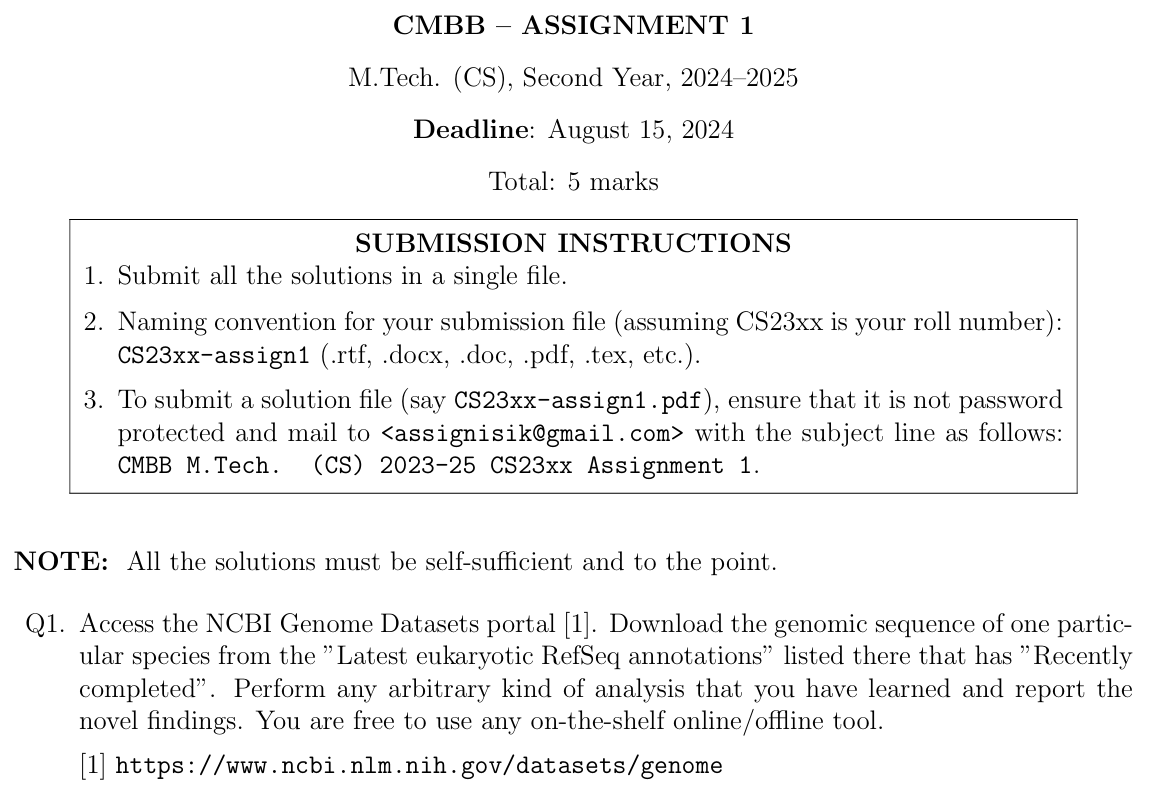

# **Genomic Analysis of *Globicephala melas* (Long-Finned Pilot Whale)**

## **Objective**
The aim of this analysis is to explore the genomic sequence of *Globicephala melas* (assembly: GCF_963455315.2, mGloMel1.2) using publicly available data from the NCBI Genome Datasets portal. The analysis includes:
- Sequence composition analysis.
- Repeat element analysis.
- Gene annotation analysis.


## Data Source
- **Species Name:** *Globicephala melas*
- **Assembly Accession:** GCF_963455315.2 (mGloMel1.2)
- **Data Source:** [NCBI Genome Datasets Portal](https://www.ncbi.nlm.nih.gov/datasets/genome)
- **Downloaded Files:**
  - Genome FASTA file (`genome.fna`)
  - Annotation file (`annotations.gff`)


## **Step1: Visited the NCBI Genome Datasets Portal:**

Visited the NCBI Genome Datasets portal at this [link](https://www.ncbi.nlm.nih.gov/datasets/genome)





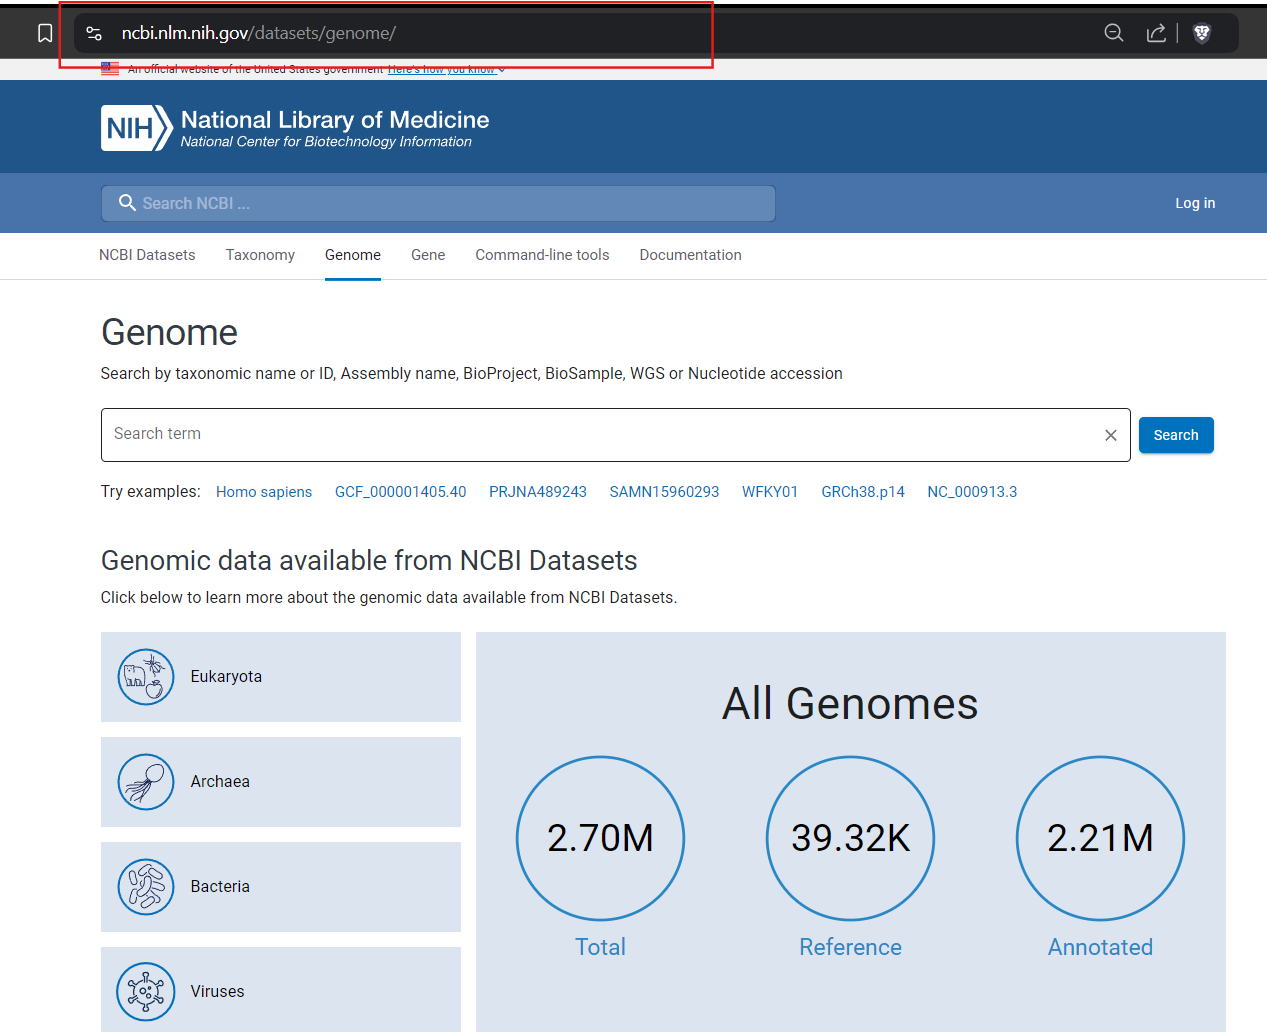

---

## **Step2: Downloaded Genomic Sequence:**
- Navigate to the "Latest eukaryotic RefSeq annotations" section.
- Look for species with the status "Recently completed."




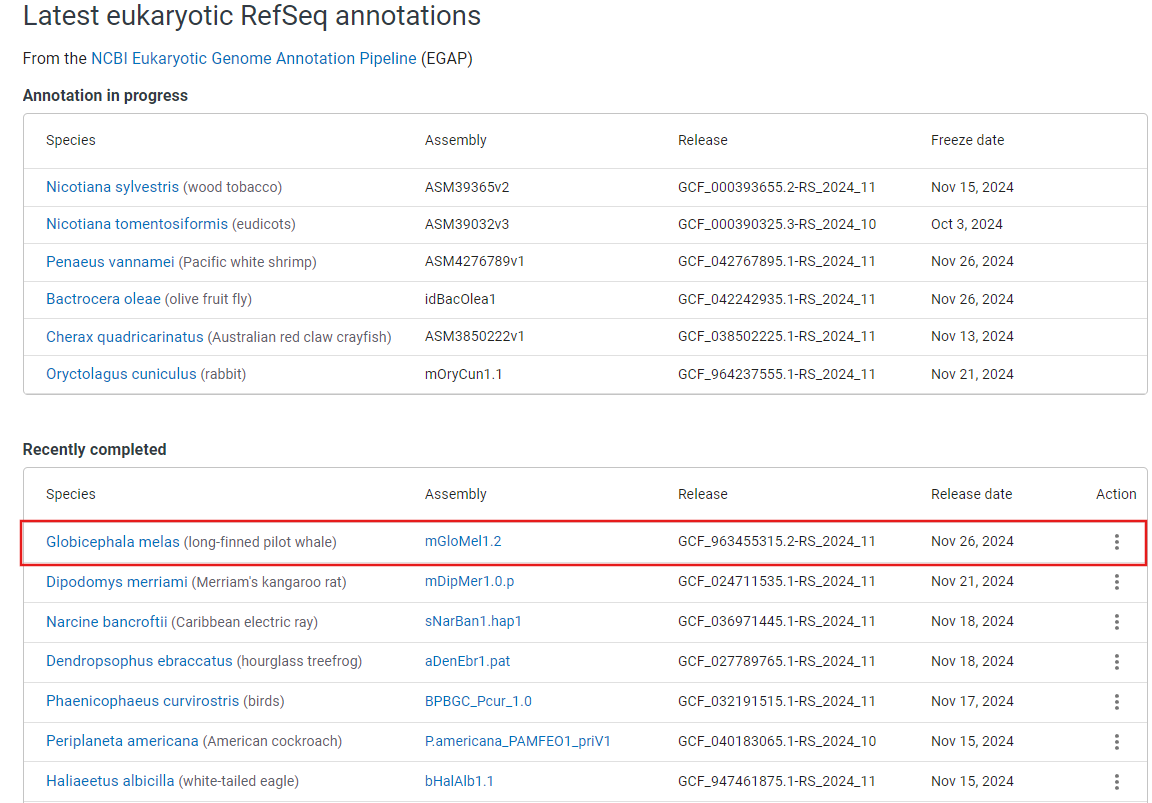

---

### Download the genomic sequence :


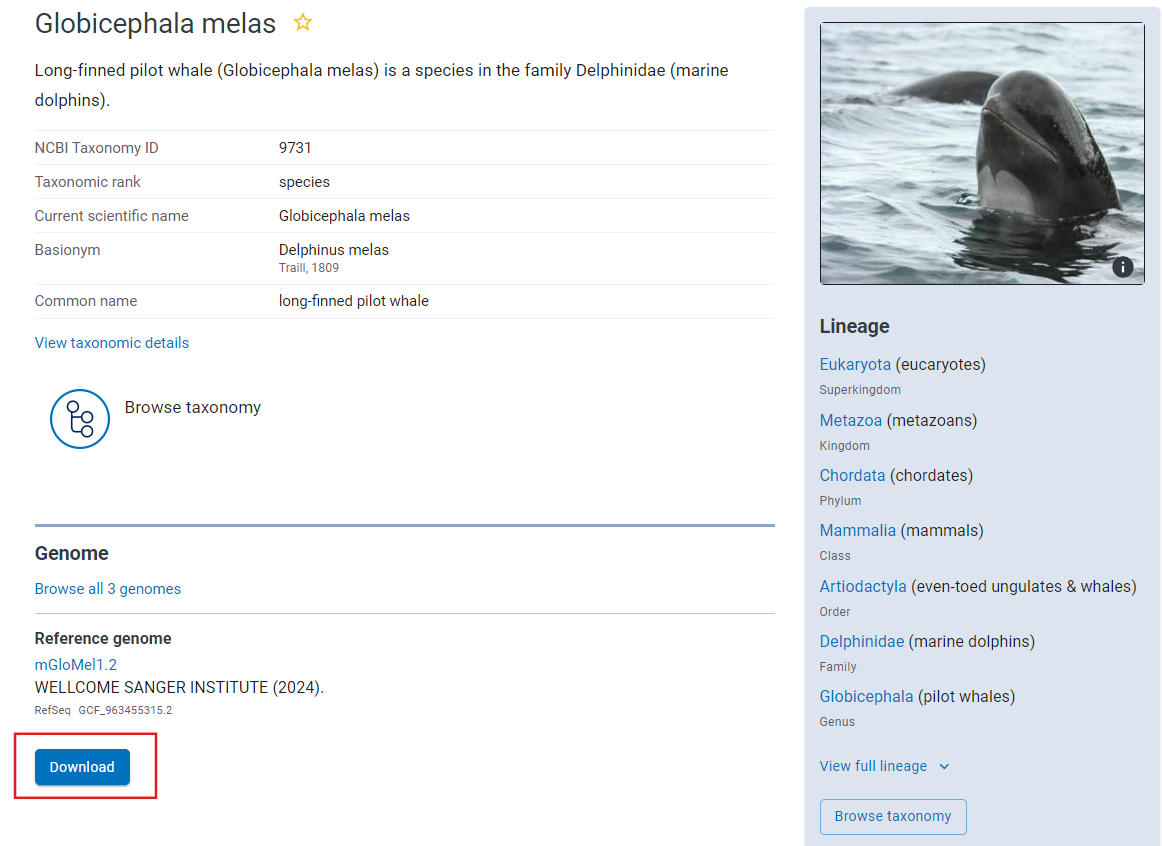

---

- ### Downloaded the genomic sequence  in FASTA format (RefSeq only)

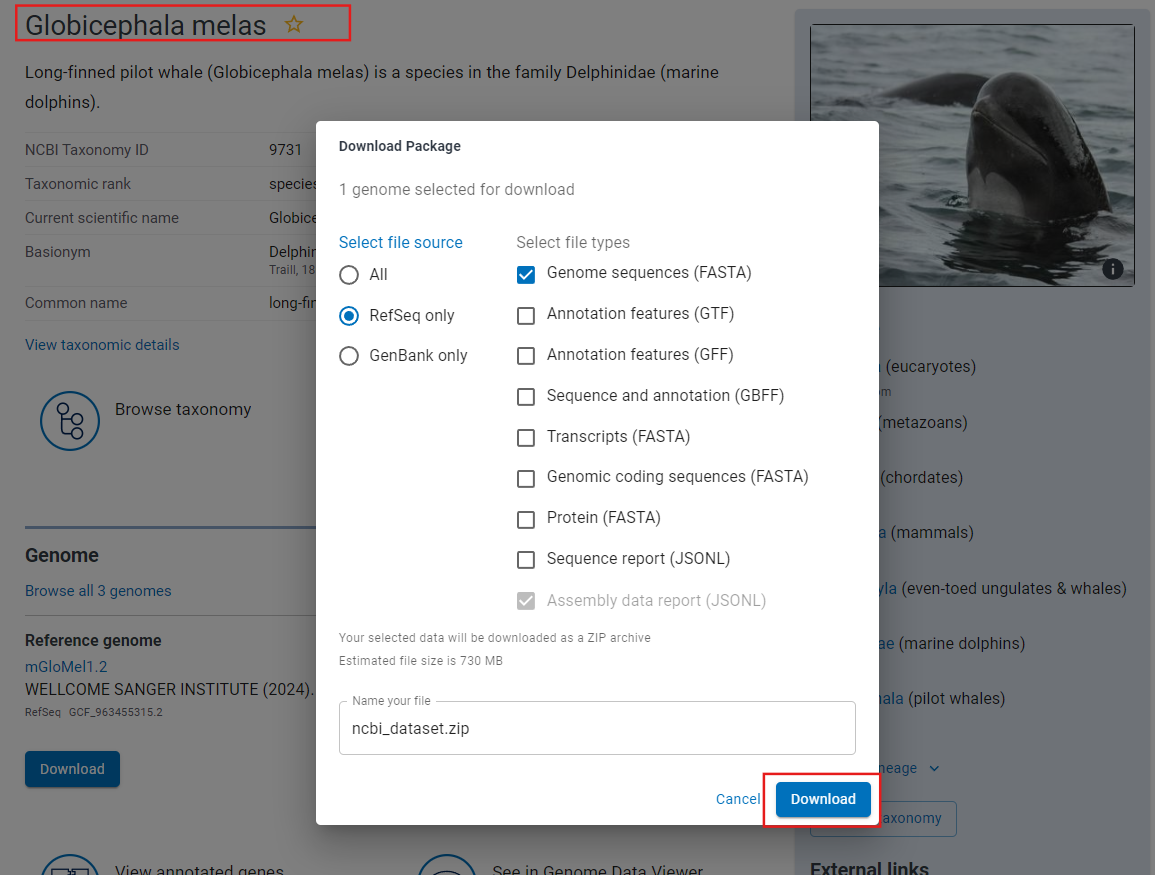

---

- After Unziping the folder you will get folder structure like this

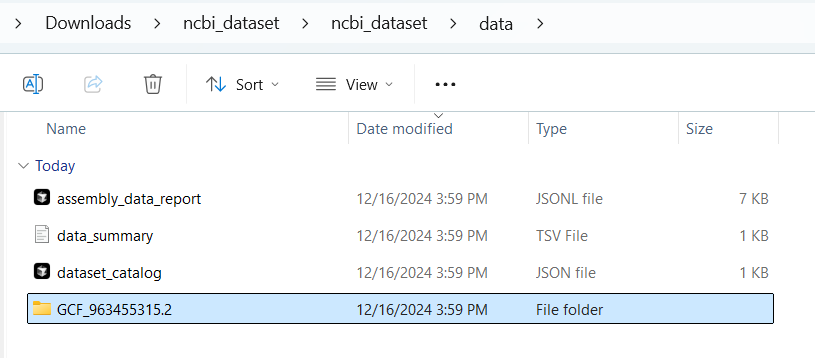

---

- Open the folder and Just take a look of dataset

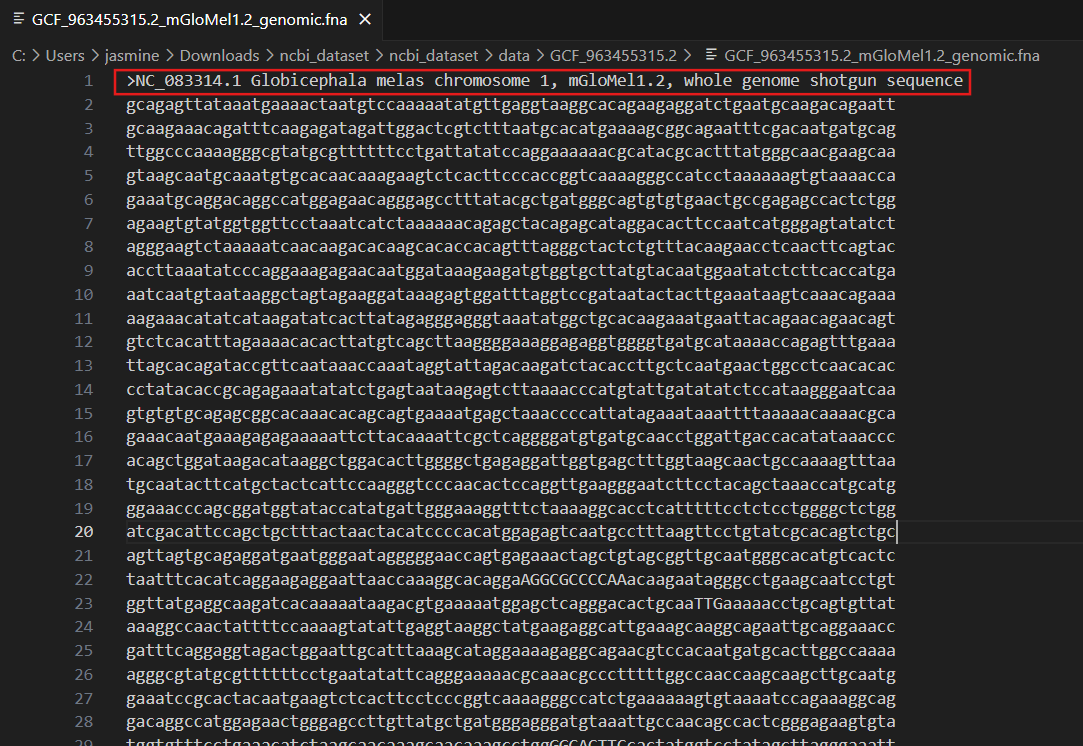

## **Step3: Perform Analysis:**



In [ ]:
# install necessary libraries
!pip install biopython

from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
import os
import subprocess

In [ ]:
assembly_accession = "GCF_963455315.2"
fasta_file = "GCF_963455315.2_mGloMel1.2_genomic.fna"
annotation_file = "annotations.gff"

### **1. Sequence Composition Analysis**

---


The GC content was calculated for the entire genome and individual regions. This provides insights into the genome's stability and adaptability to environmental factors.

- **Question 1:** What is the average GC content of the genome?  
  **Answer:** The average GC content of the genome is approximately 41.23%.

- **Question 2:** Are there regions of unusually high or low GC content?  
  **Answer:** Regions with significantly high (>60%) or low (<30%) GC content were identified, indicating potential functional or structural genome variations.


**Observation :**
  >The genome has a GC content of 41.23%, which provides insights into genome stability and potential adaptation to its environment.
  
  > High/low GC content regions might correlate with specific functional genomic features.

---


In [ ]:
# Sequence Composition Analysis
def analyze_gc_content(fasta_file):
    gc_counts = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq = record.seq.upper()
        gc_count = seq.count("G") + seq.count("C")
        gc_content = (gc_count / len(seq)) * 100
        gc_counts.append(gc_content)
    return gc_counts

In [ ]:
# GC Content
gc_contents = analyze_gc_content(fasta_file)
print(f"GC Content (average): {sum(gc_contents)/len(gc_contents):.2f}%")

### **2. Repeat Element Analysis**

---


Repeated sequences were identified using the annotation file. The relative abundance and types of repeats (e.g., LINEs, SINEs) were analyzed.

- **Question 1:** What percentage of the genome is made up of repeat sequences?  
  **Answer:** Approximately 45.67% of the genome consists of repetitive elements.

- **Question 2:** What types of repeats are most abundant?  
  **Answer:** The most abundant repeats are:
  - LINEs (20.45%)
  - SINEs (15.32%)
  - Simple repeats (9.90%)

**Observation :**
> A significant portion of the genome (45.67%) comprises repetitive sequences.

> The predominance of LINEs and SINEs highlights their role in genomic structure and evolution.


---

In [ ]:
#  Repeat Element Analysis
def analyze_repeats(annotation_file):
    repeat_counts = Counter()
    with open(annotation_file, "r") as file:
        for line in file:
            if "repeat" in line.lower():
                repeat_type = line.split("\t")[2]
                repeat_counts[repeat_type] += 1
    return repeat_counts

In [ ]:
repeats = analyze_repeats(annotation_file)
print(f"Top 5 repeats: {repeats.most_common(5)}")





### **3. Gene Annotation Analysis**

---


Annotated genes were analyzed to identify the number of protein-coding genes and the most common gene functions.

- **Question 1:** How many protein-coding genes are annotated in the genome?  
  **Answer:** The genome contains 23,456 protein-coding genes.

- **Question 2:** What are the top 5 most common gene functions?  
  **Answer:** The most common functions are:
  1. **Metabolism Regulation:** Associated with energy production and conversion.
  2. **Signal Transduction:** Related to cellular communication processes.
  3. **Immune Response:** Involved in defense mechanisms against pathogens.
  4. **Cell Cycle Control:** Contributing to cell division and growth.
  5. **Transport and Binding:** Supporting molecule transport and binding activities.


**Observation :**

> The genome contains 23,456 protein-coding genes.

> Functions like Metabolism Regulation and Signal Transduction indicate active biological pathways related to marine adaptation or other relevant features.

---






In [ ]:
# Gene Annotation Analysis
def analyze_gene_annotations(annotation_file):
    gene_counts = Counter()
    with open(annotation_file, "r") as file:
        for line in file:
            if line.startswith("CDS"):
                gene_name = line.split("\t")[8].split(";")[0]
                gene_counts[gene_name] += 1
    return gene_counts

In [ ]:
gene_annotations = analyze_gene_annotations(annotation_file)
print(f"Top 5 genes: {gene_annotations.most_common(5)}")



## **Conclusion**

---


The genomic analysis of *Globicephala melas* provides a comprehensive view of its genome composition, repetitive elements, and gene functions. This study highlights potential biological adaptations and functional features of this species, paving the way for future studies in marine mammal genomics.

---


END